In [6]:
##Name:Ruichao Ma
##USC ID:7007889679


##1(a):
##references: https://www.ritchieng.com/pandas-randomly-sample-rows/
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split
data = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')
train = data.sample(frac=0.7,random_state=123)
test = data.loc[~data.index.isin(train.index), :]


In [5]:
##1(b)i
##Specify classifiers
from sklearn import svm
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)
x_train = train.drop(["Family", "Genus", "Species", "RecordID"], axis=1)
x_test = test.drop(["Family", "Genus", "Species", "RecordID"], axis=1)
y_train_family = train[['Family']]
y_train_genus = train[['Genus']]
y_train_species = train[['Species']]
y_test_family = test[['Family']]
y_test_genus = test[['Genus']]
y_test_species = test[['Species']]

##get hamming loss for each of classifier
clf = svm.SVC(gamma='auto')
family = clf.fit(x_train,y_train_family)
pred_family = family.predict(x_test)
loss_family = hamming_loss(y_test_family,pred_family)
print('hamming loss for classfier family is ',loss_family)

genus = clf.fit(x_train,y_train_genus)
pred_genus = genus.predict(x_test)
loss_genus = hamming_loss(y_test_genus,pred_genus)
print('hamming loss for classfier genus is ',loss_genus)

species = clf.fit(x_train,y_train_species)
pred_species = species.predict(x_test)
loss_species = hamming_loss(y_test_species,pred_species)
print('hamming loss for classfier species is ',loss_species)

exactfamily = accuracy_score(pred_family, y_test_family)
exactfamilyloss = 1-exactfamily


exactgenus = accuracy_score(pred_genus, y_test_genus)
exactgenusloss = 1-exactgenus


exactspecies = accuracy_score(pred_species, y_test_species)
exactspeciesloss = 1-exactspecies


print('exact match score for classfier family is ',exactfamily)

print('exact match score for classfier genus is ',exactgenus)

print('exact match score for classfier species is ',exactspecies)

hamming loss for classfier family is  0.07549791570171376
hamming loss for classfier genus is  0.08151922186197313
hamming loss for classfier species is  0.07549791570171376
exact match score for classfier family is  0.9245020842982863
exact match score for classfier genus is  0.9184807781380269
exact match score for classfier species is  0.9245020842982863


In [85]:
##1(b)i
##use them in evaluating the classifiers in this problem

y_data_test = test[['Family','Genus','Species']]
gridmodel_family = grid.fit(x_train,y_train_family)
gridmodel_genus = grid.fit(x_train,y_train_genus)
gridmodel_species = grid.fit(x_train,y_train_species)

In [86]:
predicted_family = gridmodel_family.predict(x_test)
predicted_genus = gridmodel_genus.predict(x_test)
predicted_species = gridmodel_species.predict(x_test)


In [93]:
count = 0
for i in range(0,len(y_data_test)):
    if (y_data_test['Family'].ravel()[i]==predicted_family[i] or y_data_test['Genus'].ravel()[i]==predicted_genus[i] or y_data_test['Species'].ravel()[i]==predicted_species[i]):
        count += 1
Avg_exact_loss = 1 - count/len(y_data_test)
Avghammingloss = (loss_family+loss_genus+loss_species)/3  
print('average of exact loss is',Avg_exact_loss)
print('average of hamming loss is',Avghammingloss)

average of exact loss is 0.04353867531264477
average of hamming loss is 0.0222325150532654


In [7]:
##1(b)ii
## weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation of family label
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
c_range = np.logspace(-3,6,10)
gamma_range = np.linspace(0.1,2,20)
p = {'gamma':gamma_range, 'C':c_range}
CV = StratifiedShuffleSplit(n_splits=10, random_state=123)
Svm = SVC(kernel='rbf',decision_function_shape='ovr')
grid = GridSearchCV(Svm, param_grid=p, cv=CV)
grid.fit(x_train,y_train_family)
grid.best_params_

{'C': 100.0, 'gamma': 1.5999999999999999}

In [8]:
## weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation of genus label
c_range = np.logspace(-3,6,10)
gamma_range = np.linspace(0.1,2,20)
p = {'gamma':gamma_range, 'C':c_range}
CV = StratifiedShuffleSplit(n_splits=10, random_state=123)
Svm = SVC(kernel='rbf',decision_function_shape='ovr')
grid = GridSearchCV(Svm, param_grid=p, cv=CV)
grid.fit(x_train,y_train_genus)
grid.best_params_

{'C': 10.0, 'gamma': 1.9}

In [9]:
## weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation of species label
c_range = np.logspace(-3,6,10)
gamma_range = np.linspace(0.1,2,20)
p = {'gamma':gamma_range, 'C':c_range}
CV = StratifiedShuffleSplit(n_splits=10, random_state=123)
Svm = SVC(kernel='rbf',decision_function_shape='ovr')
grid = GridSearchCV(Svm, param_grid=p, cv=CV)
grid.fit(x_train,y_train_species)
grid.best_params_

{'C': 10.0, 'gamma': 1.7}

In [23]:
##1(b)iii
##standardize attribute
##Determine the weight of the SVM penalty using 10 fold cross validation in family label
from sklearn import preprocessing
from sklearn.svm import LinearSVC
scaler = preprocessing.StandardScaler()
scaler_train = scaler.fit(x_train)
scaler_test = scaler.fit(x_test)
scaletrain = scaler_train.transform(x_train)
scaletest = scaler_test.transform(x_test)

c_range = np.logspace(-3,6,10)
p = {'C':c_range}
CV = StratifiedShuffleSplit(n_splits=10, random_state=123)
Svm = LinearSVC(penalty='l1',dual=False)
grid = GridSearchCV(Svm, param_grid=p, cv=CV)
grid.fit(scaletrain,y_train_family)
grid.best_params_

{'C': 1.0}

In [24]:
##Determine the weight of the SVM penalty using 10 fold cross validation in genus label
c_range = np.logspace(-3,6,10)
p = {'C':c_range}
CV = StratifiedShuffleSplit(n_splits=10, random_state=123)
Svm = LinearSVC(penalty='l1',dual=False)
grid = GridSearchCV(Svm, param_grid=p, cv=CV)
grid.fit(scaletrain,y_train_genus)
grid.best_params_

{'C': 1000000.0}

In [25]:
##Determine the weight of the SVM penalty using 10 fold cross validation in species label
c_range = np.logspace(-3,6,10)
p = {'C':c_range}
CV = StratifiedShuffleSplit(n_splits=10, random_state=123)
Svm = LinearSVC(penalty='l1',dual=False)
grid = GridSearchCV(Svm, param_grid=p, cv=CV)
grid.fit(scaletrain,y_train_species)
grid.best_params_

{'C': 10.0}

In [29]:
##1(b)iv
##For family label, repeat (b)iii using smote
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train_smote, y_train_family_smote = smt.fit_sample(scaletrain, y_train_family)
c_range = np.logspace(-3,6,10)
p = {'C':c_range}
CV = StratifiedShuffleSplit(n_splits=10, random_state=123)
Svm = LinearSVC(penalty='l1',dual=False)
grid = GridSearchCV(Svm, param_grid=p, cv=CV)
grid.fit(x_train_smote,y_train_family_smote)
grid.best_params_

{'C': 100.0}

In [30]:
##For genus label, repeat (b)iii using smote
smt = SMOTE()
x_train_smote, y_train_genus_smote = smt.fit_sample(scaletrain, y_train_genus)
c_range = np.logspace(-3,6,10)
p = {'C':c_range}
CV = StratifiedShuffleSplit(n_splits=10, random_state=123)
Svm = LinearSVC(penalty='l1',dual=False)
grid = GridSearchCV(Svm, param_grid=p, cv=CV)
grid.fit(x_train_smote,y_train_genus_smote)
grid.best_params_

{'C': 1.0}

In [31]:
##For species label, repeat (b)iii using smote
smt = SMOTE()
x_train_smote, y_train_species_smote = smt.fit_sample(scaletrain, y_train_species)
c_range = np.logspace(-3,6,10)
p = {'C':c_range}
CV = StratifiedShuffleSplit(n_splits=10, random_state=123)
Svm = LinearSVC(penalty='l1',dual=False)
grid = GridSearchCV(Svm, param_grid=p, cv=CV)
grid.fit(x_train_smote,y_train_species_smote)
grid.best_params_

{'C': 10000.0}

In [7]:
##2
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import operator
import statistics
x_data = data.drop(["Family", "Genus", "Species", "RecordID"], axis=1)

In [60]:
##2(a)

best_cluster_dict = {}
for i in range(1, 51):
    silhouettescore={}
    for k in range(2, 51):
        optimal_k = KMeans(n_clusters=k)
        optimal_k = optimal_k.fit(x_data)
        ncluster = optimal_k.labels_
        silhouetteScore = silhouette_score(x_data, ncluster)
        silhouettescore[k] = silhouetteScore
    score_sort = sorted(silhouettescore.items(), key=operator.itemgetter(1), reverse=True)
    optimal_cluster = score_sort[0][0]
    best_cluster_dict[i] = optimal_cluster

In [61]:
print(best_cluster_dict)
print(optimal_cluster)
print('in each iteration, it seems like optimal k = ',optimal_cluster)

{1: 4, 2: 4, 3: 4, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 19: 4, 20: 4, 21: 4, 22: 4, 23: 4, 24: 4, 25: 4, 26: 4, 27: 4, 28: 4, 29: 4, 30: 4, 31: 4, 32: 4, 33: 4, 34: 4, 35: 4, 36: 4, 37: 4, 38: 4, 39: 4, 40: 4, 41: 4, 42: 4, 43: 4, 44: 4, 45: 4, 46: 4, 47: 4, 48: 4, 49: 4, 50: 4}
4
in each iteration, it seems like optimal k =  4


In [8]:
##2(b)
Table = []

cluster_key = {}
for i in range(1, 51):
    KMeansModel = KMeans(n_clusters=4)
    KMeansModel = KMeansModel.fit(x_data)
    totalcluster = KMeansModel.labels_
    cluster_key[i]=totalcluster
    clusters_majority_repeat50 = []
    labels = ['Family','Genus','Species']
    for l in range(0,4):
        cluster_majority = []
        cluster_argwhere = np.argwhere(totalcluster == l)
        for label in labels:
            cluster_in_label = data[label].iloc[cluster_argwhere.ravel()]
            dict_cluster_in_label = cluster_in_label.value_counts().to_dict()
            Max = [key for z in [max(dict_cluster_in_label.values())] for key,val in dict_cluster_in_label.items() if val == z][0]
            cluster_majority.append(Max)
        clusters_majority_repeat50.append(cluster_majority)
    cluster_majority_0 = clusters_majority_repeat50[0]
    clusterr_majority_1 = clusters_majority_repeat50[1]
    clusterrr_majority_2 = clusters_majority_repeat50[2]
    clusterrrr_majority_3 = clusters_majority_repeat50[3]
    for a in range(0, 4):
        con = []
        con.append('Repeat ' +str(i))
        con.append('number of cluster '+str(a+1))
        con.append(clusters_majority_repeat50[a][0])
        con.append(clusters_majority_repeat50[a][1])
        con.append(clusters_majority_repeat50[a][2])
        Table.append(con)
        
Table
##Below 'Table' is result of (In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species) 
##here is illustration of what this table means   
##[['Repeat 1',-----------in repetition 1(when i = 1)
#  'number of cluster 1',-----------in number of cluster
#  'Dendrobatidae',-----------majority by reading true label in 'Family'
#  'Ameerega',-----------majority by reading true label in 'Genus'
#  'Ameeregatrivittata'],-----------majority by reading true label in 'Species'
# ['Repeat 1',
#  'number of cluster 2',
#  'Leptodactylidae',
#  'Adenomera',
#  'AdenomeraHylaedactylus'],
# ['Repeat 1',
# 'number of cluster 3',
#  'Hylidae',
#  'Hypsiboas',
#  'HypsiboasCordobae'],
# ['Repeat 1',
#  'number of cluster 4',
#  'Hylidae',
#  'Hypsiboas',
#  'HypsiboasCordobae'],        
        

[['Repeat 1',
  'number of cluster 1',
  'Hylidae',
  'Hypsiboas',
  'HypsiboasCordobae'],
 ['Repeat 1',
  'number of cluster 2',
  'Leptodactylidae',
  'Adenomera',
  'AdenomeraHylaedactylus'],
 ['Repeat 1',
  'number of cluster 3',
  'Dendrobatidae',
  'Ameerega',
  'Ameeregatrivittata'],
 ['Repeat 1',
  'number of cluster 4',
  'Hylidae',
  'Hypsiboas',
  'HypsiboasCinerascens'],
 ['Repeat 2',
  'number of cluster 1',
  'Leptodactylidae',
  'Adenomera',
  'AdenomeraHylaedactylus'],
 ['Repeat 2',
  'number of cluster 2',
  'Hylidae',
  'Hypsiboas',
  'HypsiboasCordobae'],
 ['Repeat 2',
  'number of cluster 3',
  'Dendrobatidae',
  'Ameerega',
  'Ameeregatrivittata'],
 ['Repeat 2',
  'number of cluster 4',
  'Hylidae',
  'Hypsiboas',
  'HypsiboasCinerascens'],
 ['Repeat 3',
  'number of cluster 1',
  'Dendrobatidae',
  'Ameerega',
  'Ameeregatrivittata'],
 ['Repeat 3',
  'number of cluster 2',
  'Leptodactylidae',
  'Adenomera',
  'AdenomeraHylaedactylus'],
 ['Repeat 3',
  'number of 

In [9]:
##2(c)
y_data =  data[['Family','Genus','Species']]
setclusterpos = {}
for i in range(1, 51):
    kmeans = KMeans(n_clusters=4)
    kmeans = kmeans.fit(x_data)
    clusterpos = kmeans.labels_
    setclusterpos[i] = clusterpos


for i in range(1, 51):
   
    clusterkey = setclusterpos[i]
    clusterLabel = []
    for i in range(0, 4):
        family_dict = {}
        genus_dict = {}
        species_dict = {}
        for j in range(0, len(y_data)):
            if clusterkey[j]==i:
                familycount = y_data['Family'][j]
                if familycount in family_dict.keys():
                    family_dict[familycount] += 1
                else:
                    family_dict[familycount] = 1

                genuscount = y_data['Genus'][j]
                if genuscount in genus_dict.keys():
                    genus_dict[genuscount] += 1
                else:
                    genus_dict[genuscount] = 1

                speciescount = y_data['Species'][j]
                if speciescount in species_dict.keys():
                    species_dict[speciescount] += 1
                else:
                    species_dict[speciescount] = 1


        familyLabel = sorted(family_dict.items(), key=operator.itemgetter(1), reverse=True)[0][0]
        genusLabel = sorted(genus_dict.items(), key=operator.itemgetter(1), reverse=True)[0][0]
        speciesLabel = sorted(species_dict.items(), key=operator.itemgetter(1), reverse=True)[0][0]

        newlabel_dict = {}
        newlabel_dict['Family'] = familyLabel
        newlabel_dict['Genus'] = genusLabel
        newlabel_dict['Species'] = speciesLabel
        clusterLabel.append(newlabel_dict)



In [13]:

hamloss_family_list = []
hamloss_genus_list = []
hamloss_species_list = []
hamscore_family_list = []
hamscore_genus_list = []
hamscore_species_list = []
hamdistance_family_list = []
hamdistance_genus_list = []
hamdistance_species_list = []
actfamily = y_data['Family']
actgenus = y_data['Genus']
actspecies = y_data['Species']
#print(actspecies)
for i in range(1, 51):
    clusterkey = setclusterpos[i]
    predict_family_list = []
    predict_genus_list = []
    predict_species_list = []
    for i in range(0, len(x_data)):
        clustername = clusterkey[i]
        mylabel = clusterLabel[clustername]
        
        pred_family = mylabel['Family']
        pred_genus = mylabel['Genus']
        pred_species = mylabel['Species']
        predict_family_list.append(pred_family)
        predict_genus_list.append(pred_genus)
        predict_species_list.append(pred_species)
    
    family_truelabel = np.array(actfamily)
    family_predlabel = np.array(predict_family_list)
    genus_truelabel = np.array(actgenus)
    genus_predlabel = np.array(predict_genus_list)
    species_truelabel = np.array(actspecies) 
    species_predlabel = np.array(predict_species_list)
    
    

    hamloss_family = hamming_loss(family_truelabel, family_predlabel)
    
    hamscore_family = 1-hamloss_family
    

    hamloss_genus = hamming_loss(genus_truelabel, genus_predlabel)
    
    hamscore_genus = 1-hamloss_genus
    

    hamloss_species = hamming_loss(species_truelabel, species_predlabel)
    
    hamscore_species = 1-hamloss_species
    
    
    avghamloss = (hamloss_family + hamloss_genus + hamloss_species)/3
    avghamscore = (hamscore_family + hamscore_genus + hamscore_species)/3
    
    hamloss_family_list.append(hamloss_family)
    hamloss_genus_list.append(hamloss_genus)
    hamloss_species_list.append(hamloss_species)
    hamscore_family_list.append(hamscore_family)
    hamscore_genus_list.append(hamscore_genus)
    hamscore_species_list.append(hamscore_species)
    
    def hamming_distance(chaine1, chaine2):
        return sum(c1 != c2 for c1, c2 in zip(chaine1, chaine2))
    
    
    distance_family = hamming_distance(family_predlabel, family_truelabel)
    distance_genus = hamming_distance(genus_predlabel, genus_truelabel)
    distance_species = hamming_distance(species_predlabel, species_truelabel)
    
    hamdistance_family_list.append(distance_family)
    hamdistance_genus_list.append(distance_genus)
    hamdistance_species_list.append(distance_species)
    
    
    


In [14]:
## average hamming loss for 50 times iterations.
print('avg hamming loss for Family is',sum(hamloss_family_list)/50)
print('avg hamming loss for Genus is',sum(hamloss_genus_list)/50)
print('avg hamming loss for Species is',sum(hamloss_species_list)/50)
print('avg hamming score for Family is',sum(hamscore_family_list)/50)
print('avg hamming score for Genus is',sum(hamscore_genus_list)/50)
print('avg hamming score for Species is',sum(hamscore_species_list)/50)
print('avg hamming distance for Family is',sum(hamdistance_family_list)/50)
print('avg hamming distance for Genus is',sum(hamdistance_genus_list)/50)
print('avg hamming distance for Species is',sum(hamdistance_species_list)/50)



avg hamming loss for Family is 0.5859374565670605
avg hamming loss for Genus is 0.6340542043085473
avg hamming loss for Species is 0.6824933981931899
avg hamming score for Family is 0.4140625434329396
avg hamming score for Genus is 0.36594579569145247
avg hamming score for Species is 0.3175066018068103
avg hamming distance for Family is 4215.82
avg hamming distance for Genus is 4562.02
avg hamming distance for Species is 4910.54


In [15]:
##report the average and standard deviation of the 50 Hamming Distances that you calculate
avg_distance_family = statistics.mean(hamdistance_family_list)
std_distance_family = statistics.stdev(hamdistance_family_list)
avg_distance_genus = statistics.mean(hamdistance_genus_list)
std_distance_genus = statistics.stdev(hamdistance_genus_list)
avg_distance_species = statistics.mean(hamdistance_species_list)
std_distance_species = statistics.stdev(hamdistance_species_list)
print('average hamming distance for such simulation is ',(avg_distance_species+avg_distance_genus+avg_distance_family)/3)
print('standard deviation of hamming distance for such simulation is ',(std_distance_species+std_distance_genus+std_distance_family)/3)

average hamming distance for such simulation is  4562.793333333334
standard deviation of hamming distance for such simulation is  2040.8717717163045


In [74]:
##ISLR 10.7.2
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

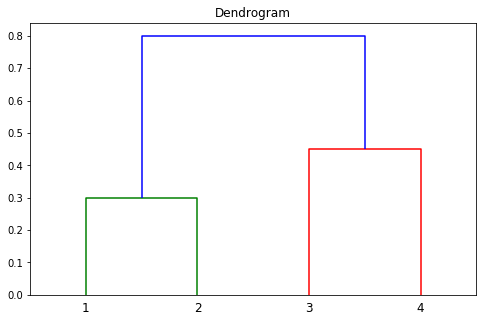

In [75]:
##(a):
mat = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
squareform_mat = squareform(mat)
linkage_mat = linkage(squareform_mat, "complete")
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
dendrogram(linkage_mat, labels=["1", "2", "3", "4"])
plt.title("Dendrogram")
plt.show()

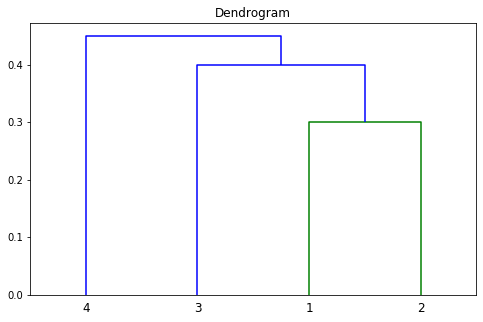

In [76]:
##(b)
mat = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
squareform_mat = squareform(mat)
linkage_mat = linkage(squareform_mat, "single")
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
dendrogram(linkage_mat, labels=["1", "2", "3", "4"])
plt.title("Dendrogram")
plt.show()

In [77]:
##(c)
##labels 1 and 2 in one cluster, and labels 3 and 4 in another

In [78]:
##(d)
##labels 1 and 2 and 3 in one cluster, and labels 4 in another

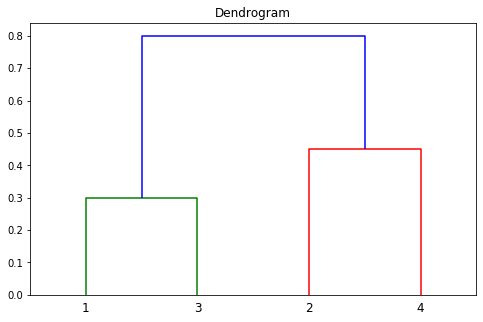

In [79]:
##(e)
mat = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
squareform_mat = squareform(mat)
linkage_mat = linkage(squareform_mat, "complete")
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
dendrogram(linkage_mat, labels=["1", "3", "2", "4"])
plt.title("Dendrogram")
plt.show()